#  این فایل جواب قسمت شش سوال است

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Load data from the CSV file
file_path = "sonar.csv"
df = pd.read_csv(file_path, header=None)
torch.manual_seed(42)
# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to numerical values
label_mapping = {'R': 0, 'M': 1}
y_numeric = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 30
output_size = 2  # Number of classes
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Lists to store training and testing losses and accuracies
train_losses = []
test_losses = []

# Different batch sizes to try
batch_sizes = [128, 64, 32]

for batch_size in batch_sizes:
    # Create DataLoader for training with the current batch size
    train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize model and optimizer for each batch size
    model = MLP(input_size, hidden_size, output_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    print(f"Training with Batch Size: {batch_size}")

    # Training the model
    epochs = 100
    for epoch in range(epochs):
        model.train()

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
            test_loss = criterion(test_outputs, torch.tensor(y_test.values, dtype=torch.long))

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {loss.item()}, Test Loss: {test_loss.item()}')




Training with Batch Size: 128
Epoch [1/100], Train Loss: 0.6717053651809692, Test Loss: 0.6586428880691528
Epoch [2/100], Train Loss: 0.6491823196411133, Test Loss: 0.6575995683670044
Epoch [3/100], Train Loss: 0.6679653525352478, Test Loss: 0.6564244031906128
Epoch [4/100], Train Loss: 0.6790130734443665, Test Loss: 0.655129075050354
Epoch [5/100], Train Loss: 0.6558425426483154, Test Loss: 0.6540982127189636
Epoch [6/100], Train Loss: 0.6587244868278503, Test Loss: 0.6531526446342468
Epoch [7/100], Train Loss: 0.6449398398399353, Test Loss: 0.6520947217941284
Epoch [8/100], Train Loss: 0.6659762859344482, Test Loss: 0.651378333568573
Epoch [9/100], Train Loss: 0.6534503698348999, Test Loss: 0.6500970125198364
Epoch [10/100], Train Loss: 0.6793573498725891, Test Loss: 0.6494120955467224
Epoch [11/100], Train Loss: 0.68017578125, Test Loss: 0.6483462452888489
Epoch [12/100], Train Loss: 0.6533705592155457, Test Loss: 0.6474325060844421
Epoch [13/100], Train Loss: 0.6630683541297913, Te

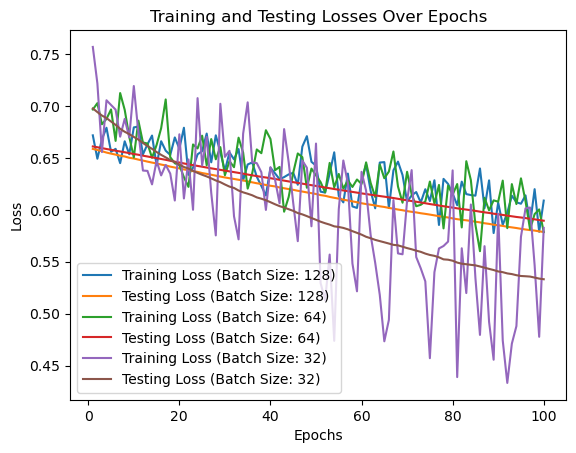

In [4]:
# Plotting the training and testing losses
plt.plot(range(1, epochs + 1), train_losses[:epochs], label='Training Loss (Batch Size: 128)')
plt.plot(range(1, epochs + 1), test_losses[:epochs], label='Testing Loss (Batch Size: 128)')
plt.plot(range(1, epochs + 1), train_losses[epochs:2*epochs], label='Training Loss (Batch Size: 64)')
plt.plot(range(1, epochs + 1), test_losses[epochs:2*epochs], label='Testing Loss (Batch Size: 64)')
plt.plot(range(1, epochs + 1), train_losses[2*epochs:], label='Training Loss (Batch Size: 32)')
plt.plot(range(1, epochs + 1), test_losses[2*epochs:], label='Testing Loss (Batch Size: 32)')

plt.title('Training and Testing Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
